In [1]:
import numpy as np
import pandas as pd
import pylab as plt

In [2]:
dta = [126.4,82.4,78.1,51.1,90.9,76.2,104.5,87.4,
        110.5,25,69.3,53.5,39.8,63.6,46.7,72.9,
        79.6,83.6,80.7,60.3,79,74.4,49.6,54.7,
        71.8,49.1,103.9,51.6,82.4,83.6,77.8,79.3,
        89.6,85.5,58,120.7,110.5,65.4,39.9,40.1,
        88.7,71.4,83,55.9,89.9,84.8,105.2,113.7,
        124.7,114.5,115.6,102.4,101.4,89.8,71.5,70.9,
        98.3,55.5,66.1,78.4,120.5,97,110]
data = pd.Series(dta,name='snowfall')

D:\Soft\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


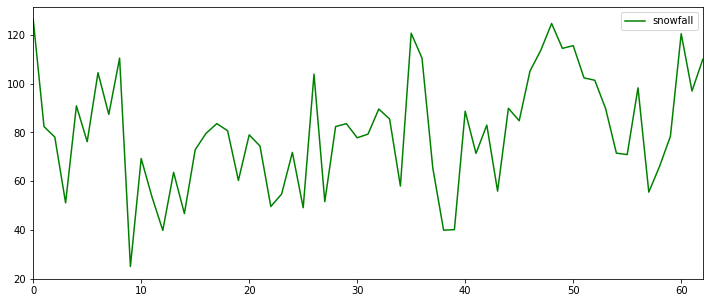

In [3]:
data.plot(figsize=[12,5],colors='g')
plt.legend()

In [4]:
from statsmodels.stats.diagnostic import unitroot_adf # 平稳性检验
from statsmodels.stats.diagnostic import acorr_ljungbox    #白噪声检验
print(unitroot_adf(data))
print("-------+-+-+-+这-里-是-分-割-线+-+-+-+-----------")
print(acorr_ljungbox(data,lags=6))

(-5.718539156024829, 7.028398463320256e-07, 0, 62, {'1%': -3.540522678829176, '5%': -2.9094272025108254, '10%': -2.5923136524453696}, 456.675989420677)
-------+-+-+-+这-里-是-分-割-线+-+-+-+-----------
(array([ 6.19061602, 12.06397555, 12.15915894, 13.27320999, 13.2789094 ,
       13.28395274]), array([0.01284295, 0.00240072, 0.00685737, 0.01001519, 0.02090067,
       0.03874194]))


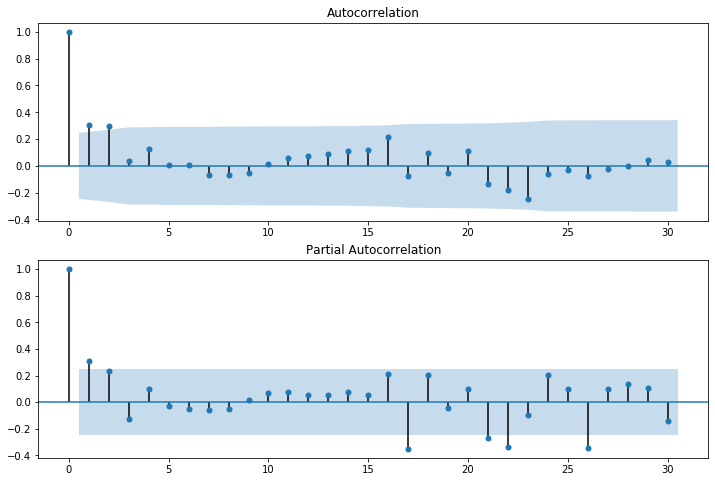

In [5]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_acf(data.values.squeeze(),lags=30,ax=ax1)
fig = sm.graphics.tsa.plot_pacf(data,lags=30,ax=ax2)

In [6]:
# 根据bic准则编写函数来推荐最优的模型：
def SelectModel(data):
    best_model = sm.tsa.ARMA(data,(0,0)).fit()
    for i in range(3):
        for j in range(3):
            arma_mod = sm.tsa.ARMA(data,(i,j)).fit()
            print('当p和q为，相应的bic值为：',i,j,arma_mod.bic)
            if best_model.bic > arma_mod.bic :
                best_model = arma_mod
    print('根据bic准则，选出最优的模型为：',best_model.summary2())
            
SelectModel(data)

当p和q为，相应的bic值为： 0 0 585.0196461353654
当p和q为，相应的bic值为： 0 1 584.9608049276461
当p和q为，相应的bic值为： 0 2 582.8926968574762
当p和q为，相应的bic值为： 1 0 582.4418993309467
当p和q为，相应的bic值为： 1 1 584.6398416961379
当p和q为，相应的bic值为： 1 2 586.9726069443979
当p和q为，相应的bic值为： 2 0 583.1629261078465


D:\Soft\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Soft\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Soft\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
D:\Soft\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


当p和q为，相应的bic值为： 2 1 590.7485143337617
当p和q为，相应的bic值为： 2 2 592.9401515229004
根据bic准则，选出最优的模型为：                           Results: ARMA
Model:              ARMA             BIC:                 582.4419
Dependent Variable: snowfall         Log-Likelihood:      -285.01 
Date:               2019-11-13 16:44 Scale:               1.0000  
No. Observations:   63               Method:              css-mle 
Df Model:           2                Sample:              0       
Df Residuals:       61                                    3       
Converged:          1.0000           S.D. of innovations: 22.288  
No. Iterations:     8.0000           HQIC:                578.541 
AIC:                576.0125                                      
------------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------
const              80.8792   4.1723 19.3850 0.0000 72.7018 89.

D:\Soft\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Soft\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [9]:
arma_mod = sm.tsa.ARMA(data,(1,0)).fit()
print(arma_mod.params)

const             80.879234
ar.L1.snowfall     0.330187
dtype: float64


In [10]:
arma_mod.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: ARMA
==================================================================
Model:              ARMA             BIC:                 582.4419
Dependent Variable: snowfall         Log-Likelihood:      -285.01 
Date:               2019-11-13 16:44 Scale:               1.0000  
No. Observations:   63               Method:              css-mle 
Df Model:           2                Sample:              0       
Df Residuals:       61                                    3       
Converged:          1.0000           S.D. of innovations: 22.288  
No. Iterations:     8.0000           HQIC:                578.541 
AIC:                576.0125                                      
------------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------
const              80.8792   4.1723 19.3850 0.0000 72.7018 89.0567
ar.L1.snowfall      0.3302   0.1237  2.6700 0.0097  0.0878  0.5726
---------------------------------------------------------------------------
               Real           Imaginary          Modulus          Frequency
---------------------------------------------------------------------------
AR.1          3.0286             0.0000           3.0286             0.0000
==================================================================

"""

In [19]:
predict_number = arma_mod.predict(len(data),len(data)+5)
print(predict_number)

63    93.170101
64    89.342602
65    86.769199
66    85.038981
67    83.875676
68    83.093532
dtype: float64
